In [2]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from torchvision import transforms
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
loaded_data = np.load('inputs/rheed_stoich_data.npz')

stoich = loaded_data['stoich'].astype(np.float32)
images = loaded_data['images'].astype(np.float32)

print(stoich.shape, images.shape)

(31,) (31, 540, 720)


In [4]:
# sort indices by stoichiometry (low → high)
idx = np.argsort(stoich)

stoich_sorted = stoich[idx]
images_sorted = images[idx]

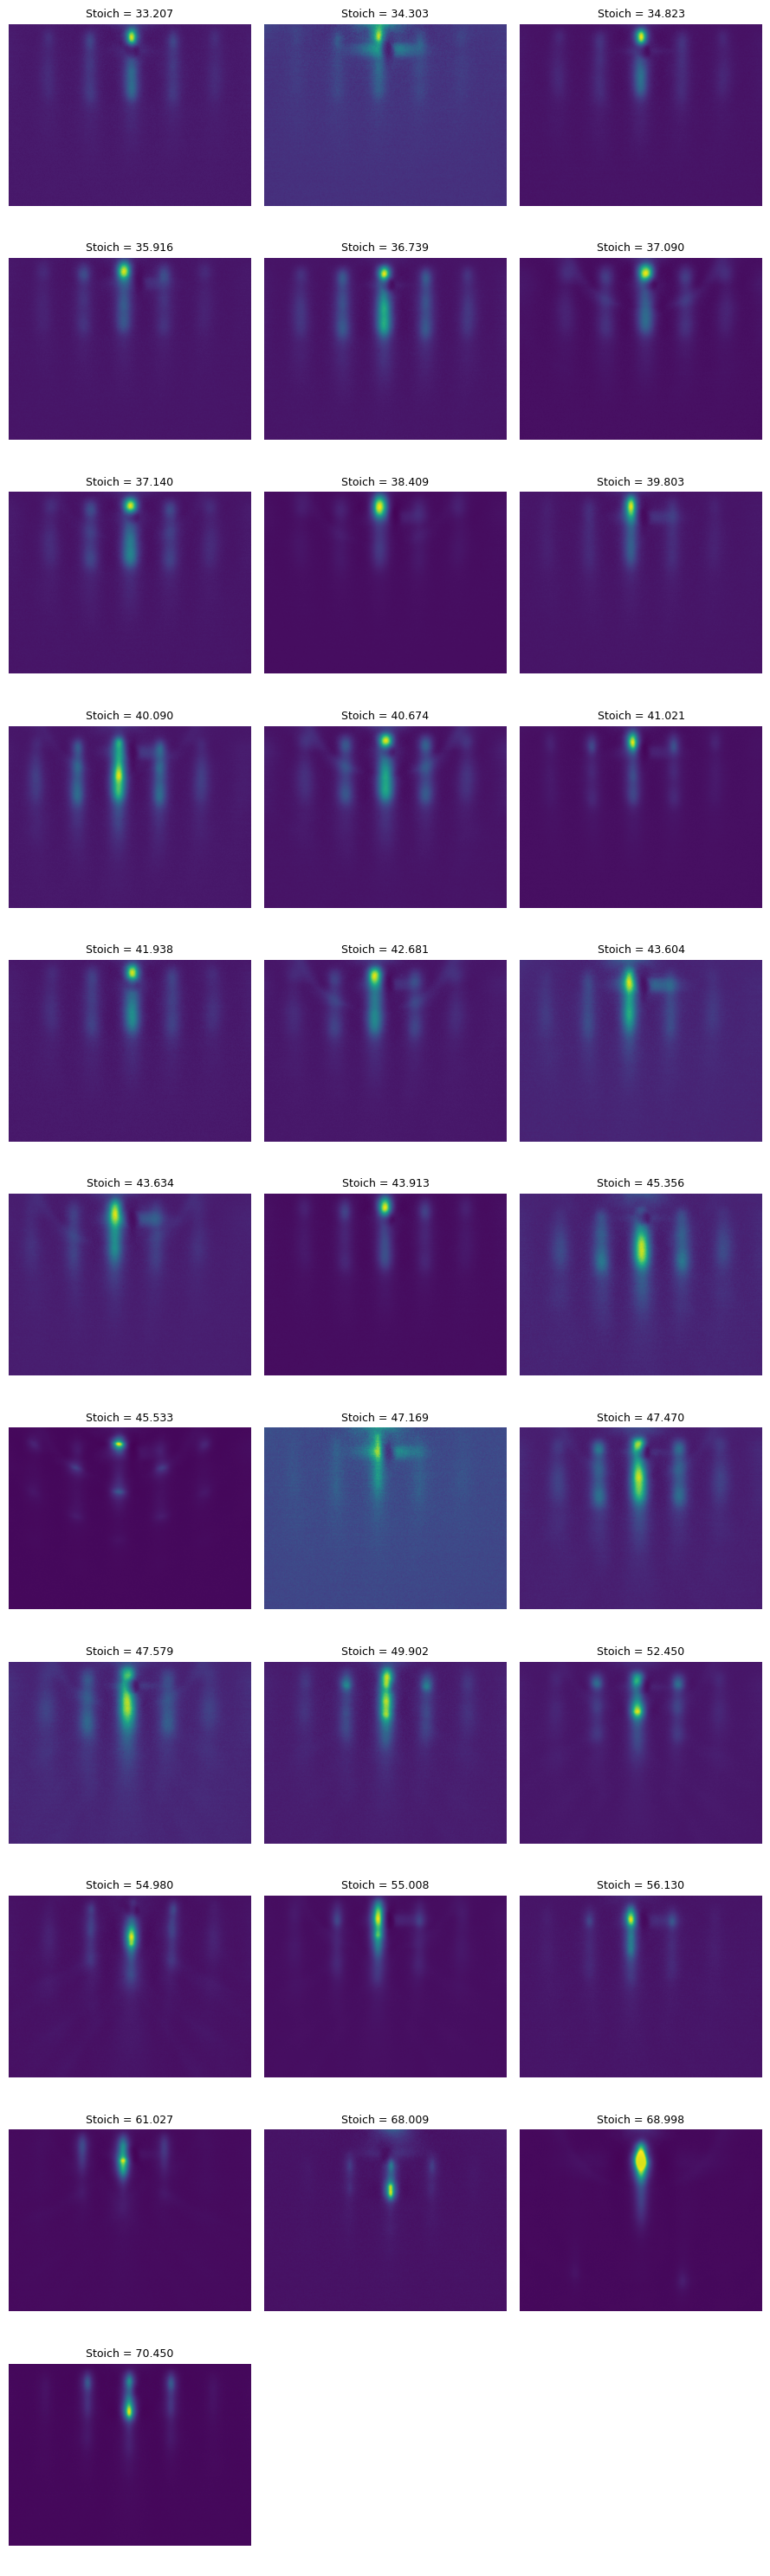

In [5]:
fig, axes = plt.subplots(11, 3, figsize=(9, 30))
axes = axes.flatten()

for i in range(31):
    axes[i].imshow(images_sorted[i], cmap="viridis")
    axes[i].set_title(f"Stoich = {stoich_sorted[i]:.3f}", fontsize=9)
    axes[i].axis("off")

# hide unused subplot(s)
for j in range(31, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()